In [1]:
!zip -r 2PDreamRec.zip . -x .venv/* -x .idea/*

updating: DreamRec_Gen.py (deflated 73%)
updating: recorders.py (deflated 79%)
updating: Modules_ori.py (deflated 81%)
updating: .git/ (stored 0%)
updating: .git/logs/ (stored 0%)
updating: .git/logs/refs/ (stored 0%)
updating: .git/logs/refs/remotes/ (stored 0%)
updating: .git/logs/refs/remotes/origin/ (stored 0%)
updating: .git/logs/refs/remotes/origin/HEAD (deflated 26%)
updating: .git/logs/refs/remotes/origin/master (deflated 14%)
updating: .git/logs/refs/heads/ (stored 0%)
updating: .git/logs/refs/heads/master (deflated 26%)
updating: .git/logs/HEAD (deflated 26%)
updating: .git/packed-refs (deflated 36%)
updating: .git/config (deflated 34%)
updating: .git/FETCH_HEAD (deflated 5%)
updating: .git/objects/ (stored 0%)
updating: .git/objects/c9/ (stored 0%)
updating: .git/objects/c9/7ff069c502ab1c063763a59863a1f4c00f0a11 (stored 0%)
updating: .git/objects/info/ (stored 0%)
updating: .git/objects/info/commit-graph (deflated 34%)
updating: .git/objects/info/packs (deflated 31%)
updatin

In [17]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
pwd: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [12]:
# !git clone https://github.com/amir-7979/2PDreamRec
# import os
os.chdir('/home/nit/Desktop/2PDreamRec')

In [20]:
!python3 dataset.py

Extraction complete!
Data loaded: (1000209, 6)
Reindexed data: (1000209, 6)
Processing Users: 100%|█████████████████████| 604/604 [00:00<00:00, 1304.71it/s]
Saved statics.csv with dataset information.
Nested 10-Fold dataset preparation complete!


In [21]:
#!python -u DreamRec_Gen.py --tune
!python3 -u DreamRec_Movies.py --tune


Mapping file not found. Proceeding without genre filtering.
Loaded genre-to-movies mapping
Tuning lr based on loss:   0%|                            | 0/4 [00:00<?, ?it/s]
========== Fold 1 ==========
3883
Fold 1 Epoch 001; Train loss: 0.6216; Time: 00:00:05
Fold 1 Epoch 002; Train loss: 0.5790; Time: 00:00:03
Fold 1 Epoch 003; Train loss: 0.5774; Time: 00:00:04
Fold 1 Epoch 004; Train loss: 0.5796; Time: 00:00:04
Fold 1 Epoch 005; Train loss: 0.5834; Time: 00:00:04
Fold 1 Epoch 006; Train loss: 0.5822; Time: 00:00:03
Fold 1 Epoch 007; Train loss: 0.5980; Time: 00:00:04
Fold 1 Epoch 008; Train loss: 0.5634; Time: 00:00:03
Fold 1 Epoch 009; Train loss: 0.5577; Time: 00:00:03
Fold 1 Epoch 010; Train loss: 0.5594; Time: 00:00:03
Fold 1: Evaluation at Epoch 10
HR@5       NDCG@5     HR@10      NDCG@10   
0.039735   0.026346   0.052980   0.030472  
Loss: 0.6208
Fold 1 Epoch 011; Train loss: 0.5554; Time: 00:00:04
Fold 1 Epoch 012; Train loss: 0.5543; Time: 00:00:04
Fold 1 Epoch 013; Train lo

Saved plot to: ./item/plots/param_tuning_lr.png


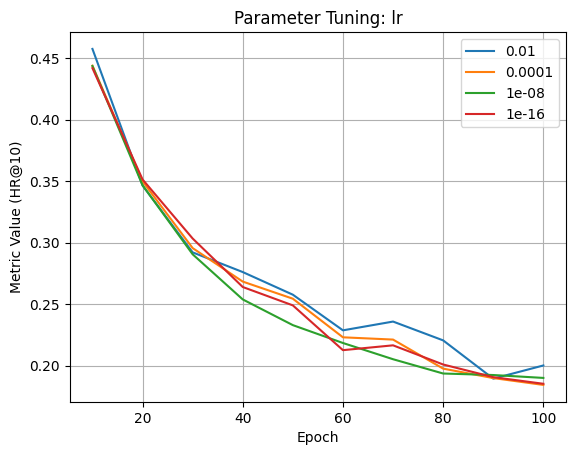

Saved plot to: ./item/plots/param_tuning_optimizer.png


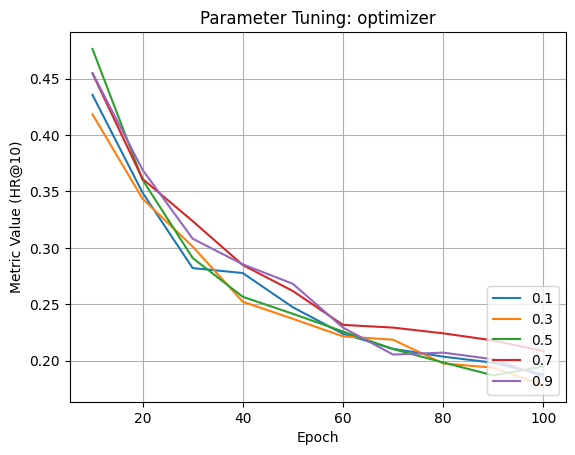

Saved plot to: ./item/plots/param_tuning_timesteps.png


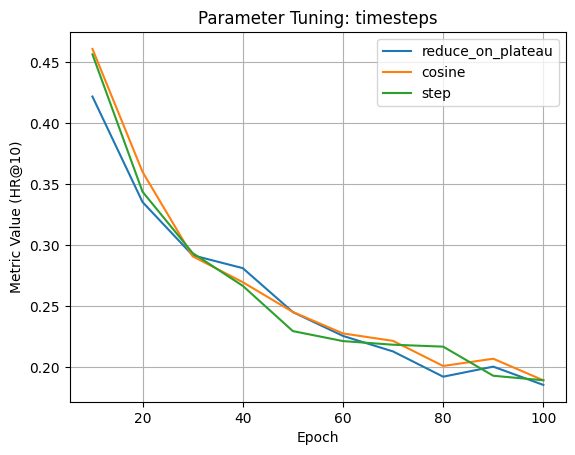

Saved plot to: ./item/plots/metrics_combined.png


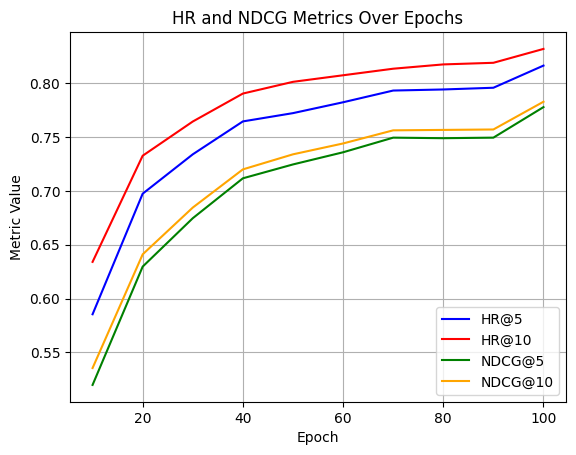

Saved plot to: ./item/plots/train_test_loss.png


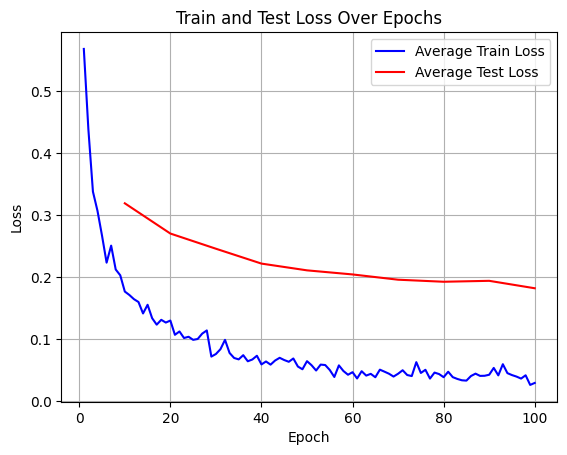

ValueError: 'Epoch' is not in list

In [ ]:
import json
import matplotlib.pyplot as plt
import os

class Plotter:
    def __init__(self, tuning_lr_path=None, tuning_optimizer_path=None, 
                 tuning_timesteps_path=None, average_metrics_path=None, 
                 avg_train_loss_path=None, output_dir='./plots'):
        """Initialize the Plotter with paths to data files and output directory."""
        self.tuning_lr_path = tuning_lr_path
        self.tuning_optimizer_path = tuning_optimizer_path
        self.tuning_timesteps_path = tuning_timesteps_path
        self.average_metrics_path = average_metrics_path
        self.avg_train_loss_path = avg_train_loss_path
        self.output_dir = output_dir
        
        os.makedirs(output_dir, exist_ok=True)

    def _get_plot_filename(self, base_name):
        """Helper method to construct full path for saved plots."""
        return os.path.join(self.output_dir, f'{base_name}.png')

    def plot_param_tuning(self):
        files = [
            ('lr', self.tuning_lr_path),
            ('optimizer', self.tuning_optimizer_path),
            ('timesteps', self.tuning_timesteps_path)
        ]
        
        for param_type, fpath in files:
            if fpath is None:
                continue
                
            with open(fpath, 'r') as f:
                data = json.load(f)
            
            plt.figure()
            for candidate, metrics in data.items():
                epochs = sorted([int(ep) for ep in metrics.keys()])
                values = [metrics[str(ep)] for ep in epochs]
                plt.plot(epochs, values, label=str(candidate))
                
                

            plt.xlabel('Epoch')
            plt.ylabel('Metric Value (HR@10)')
            plt.title(f'Parameter Tuning: {param_type}')
            if param_type == "optimizer":
                plt.legend(loc='lower right')
            else:
                plt.legend(loc='best')
            plt.grid(True)
            
            filename = self._get_plot_filename(f'param_tuning_{param_type}')
            plt.savefig(filename, bbox_inches='tight', dpi=300)
            print(f"Saved plot to: {filename}")
            plt.show()
            plt.close()

    def plot_metrics(self):
        """Plots hit rates and NDCG values in a single figure."""
        if self.average_metrics_path is None:
            print("No average metrics file provided.")
            return
        
        epochs, hr5, hr10, ndcg5, ndcg10 = [], [], [], [], []
        
        with open(self.average_metrics_path, 'r') as f:
            lines = f.readlines()
            if lines[0].strip().startswith("Average Metrics Across Folds"):
                lines = lines[1:]
            header = lines[0].strip().split()
            epoch_idx = header.index("Epoch")
            hr5_idx = header.index("AvgHR@5")
            hr10_idx = header.index("AvgHR@10")
            ndcg5_idx = header.index("AvgNDCG@5")
            ndcg10_idx = header.index("AvgNDCG@10")
            
            for line in lines[1:]:
                if not line.strip():
                    continue
                parts = line.strip().split()
                epochs.append(int(parts[epoch_idx]))
                hr5.append(float(parts[hr5_idx]))
                hr10.append(float(parts[hr10_idx]))
                ndcg5.append(float(parts[ndcg5_idx]))
                ndcg10.append(float(parts[ndcg10_idx]))

        plt.figure()
        plt.plot(epochs, hr5, color='blue', label='HR@5')
        plt.plot(epochs, hr10, color='red', label='HR@10')
        plt.plot(epochs, ndcg5, color='green', label='NDCG@5')
        plt.plot(epochs, ndcg10, color='orange', label='NDCG@10')

    
        plt.xlabel('Epoch')
        plt.ylabel('Metric Value')
        plt.title('HR and NDCG Metrics Over Epochs')
        plt.legend()
        plt.grid(True)
        
        filename = self._get_plot_filename('metrics_combined')
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        print(f"Saved plot to: {filename}")
        plt.show()
        plt.close()

    def plot_train_test_loss(self):
        """Plots train and test loss curves using blue and red colors."""
        if self.avg_train_loss_path is None or self.average_metrics_path is None:
            print("Train loss or average metrics file not provided.")
            return
        
        train_losses = []
        with open(self.avg_train_loss_path, 'r') as f:
            for line in f:
                if line.strip():
                    train_losses.append(float(line.strip()))
        epochs_train = list(range(1, len(train_losses) + 1))
        
        test_epochs, test_losses = [], []
        with open(self.average_metrics_path, 'r') as f:
            lines = f.readlines()
            if lines[0].strip().startswith("Average Metrics Across Folds"):
                lines = lines[1:]
            header = lines[0].strip().split()
            epoch_idx = header.index("Epoch")
            test_loss_idx = header.index("AvgTestLoss")
            
            for line in lines[1:]:
                if not line.strip():
                    continue
                parts = line.strip().split()
                test_epochs.append(int(parts[epoch_idx]))
                test_losses.append(float(parts[test_loss_idx]))
        
        plt.figure()
        plt.plot(epochs_train, train_losses, color='blue', label='Average Train Loss')
        plt.plot(test_epochs, test_losses, color='red', label='Average Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Train and Test Loss Over Epochs')
        plt.legend()
        plt.grid(True)
        
        filename = self._get_plot_filename('train_test_loss')
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        print(f"Saved plot to: {filename}")
        plt.show()
        plt.close()
        
# Create and run Plotter instances
plotter = Plotter(
    tuning_lr_path="./category/tuning_lr.json",
    tuning_optimizer_path="./category/tuning_optimizer.json",
    tuning_timesteps_path="./category/tuning_timesteps.json",
    average_metrics_path="./category/average_metrics.txt",
    avg_train_loss_path="./category/avg_train_loss.txt",
    output_dir="./category/plots"
)

plotter.plot_param_tuning()
plotter.plot_metrics()
plotter.plot_train_test_loss()

plotter2 = Plotter(
    tuning_lr_path="./item/tuning_lr.json",
    tuning_optimizer_path="./item/tuning_optimizer.json",
    tuning_timesteps_path="./item/tuning_timesteps.json",
    average_metrics_path="./item/average_metrics.txt",
    avg_train_loss_path="./item/avg_train_loss.txt",
    output_dir="./item/plots"
)

plotter2.plot_param_tuning()
plotter2.plot_metrics()
plotter2.plot_train_test_loss()

plotter3 = Plotter(
   
    average_metrics_path="./item/movie_exp_p1_metrics.txt",
    avg_train_loss_path="./item/movie_exp_p1_metrics.txt",
    output_dir="./item/p1"
)

plotter3.plot_metrics()
